<a href="https://colab.research.google.com/github/TankEngine1234/CPTS440/blob/main/Copy_of_CPTS_440_540_Homework_3_(Spring_2024).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**HOMEWORK 3**

Assigned: March 05 (4:00PM)

Due: March 26 (11:59PM midnight)

This assignment consists five questions. Two of them require you to generate some Python code.

--

You are expected to:

(1) clone the notebook to your own Google Drive;

(2) enter your answer and code to the cloned notebook directly; and

(3) upload the shareable link of your notebook to Canvas (as your homework submission).

**Note that if you forget to enable sharing on your Colab link, we will not be able to grade your work. You must also make sure that the sharing is for Editor rather than Viewer. Otherwise, we will not be able to run your code.**

--

**Please do NOT attempt to enter your answer directly on the original homework notebook, which is only viewable. Late submission is only possible within one day, and a deduction of 5% per day will be applied.**

**PROBLEM 1** [20pts]

Consider the Bayesian Net shown in the figure below, which depicts the relationships among variables associated with chest abnormality. Answer the following questions based on the graphical model.

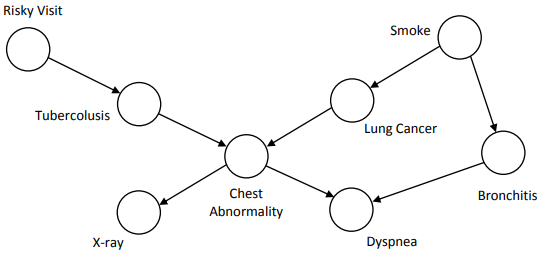

A. Is ($\mathrm{Smoke} \perp \mathrm{Dyspnea} \ |\  \mathrm{Bronchitis}$) True or False? Why? [5pts]

B. Is ($\mathrm{Bronchitis} \perp \mathrm{X-ray} \ | \ \mathrm{Lung \ Cancer}$) True or False? Why? [5pts]

C. Is $\mathrm{Smoke} \perp \mathrm{RiskyVisit} \ | \ \mathrm{Dyspnea}$ True or False? Why? [5pts]

D. Is $\mathrm{X-ray} \perp \mathrm{Smoke} \ | \ \{\mathrm{Cancer}, \mathrm{Bronchitis}\}$ True or False? Why? [5pts]

**SOLUTION**

A. The direct path
Smoke→Bronchitis→Dyspnea would be blocked by conditioning on “Bronchitis” (chain node).

However, there is another path
Smoke→LungCancer→ChestAbnormality→Dyspnea which is not blocked by knowing “Bronchitis.”

Hence not d‐separated ⇒ False.

B. Typical path is
Bronchitis←Smoke→LungCancer→ChestAbnormality→X‐ray.

“LungCancer” is on that chain, and we condition on it. Conditioning on a chain/fork node blocks the path.

Other routes also end up blocked. ⇒ True.

C. One key path is
Smoke→LungCancer→ChestAbnormality←Tuberculosis←RiskyVisit.

“ChestAbnormality” is a collider of “Tuberculosis” and “LungCancer,” and “Dyspnea” is a child of “ChestAbnormality.” Observing a descendant of a collider (Dyspnea) unblocks that collider.

Hence they are not d‐separated ⇒ False.

D. The straightforward chain
Smoke→LungCancer→ChestAbnormality→X‐ray is blocked by conditioning on the chain node “LungCancer.”

Attempts to go around via “Bronchitis” or “Dyspnea” are also blocked because “Bronchitis” is conditioned on (blocking that chain) or “Dyspnea” is a collider we have not conditioned on.

All paths become blocked ⇒ True.

**PROBLEM 2** [25pts]

Given the Bayesian Net in the figure below, where each random variable is binary, i.e. $X_i \in \{True,False\}$. Compute the distribution tables for the following probabilities. Show step-by-step derivations clearly in each case. Provide answers accurate to $4$ decimal places.

A. $P(X_1 \mid X_5)$

B. $P(X_2 \mid X_4)$

C. $P(X_3 \mid X_2)$

D. $P(X_4 \mid X_3)$

E. $P(X_5)$

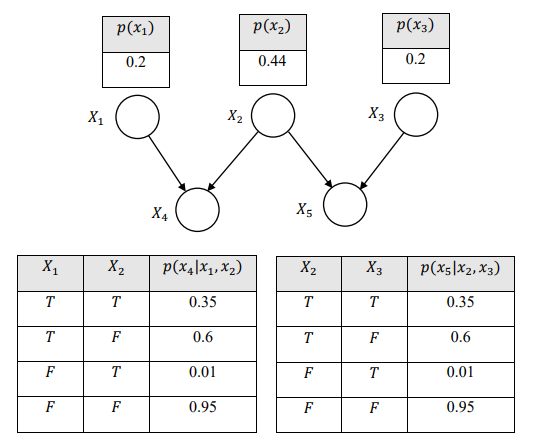



**SOLUTION**

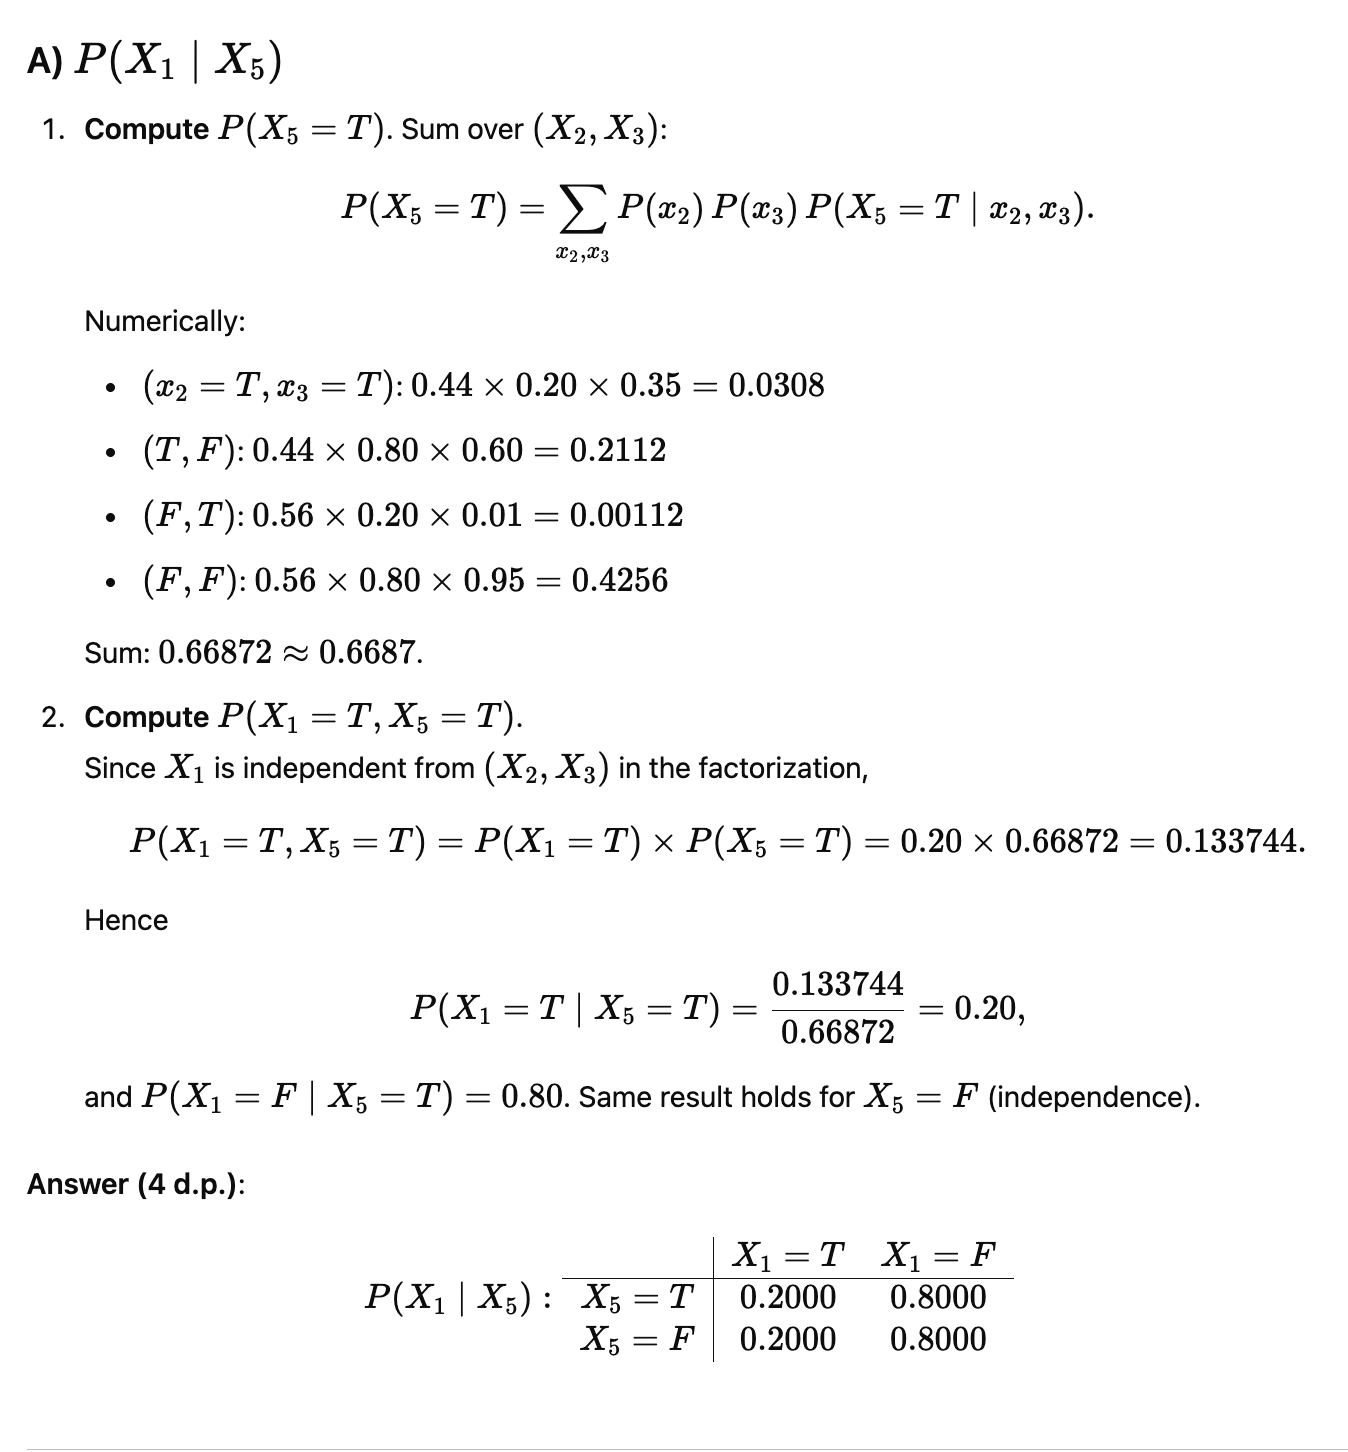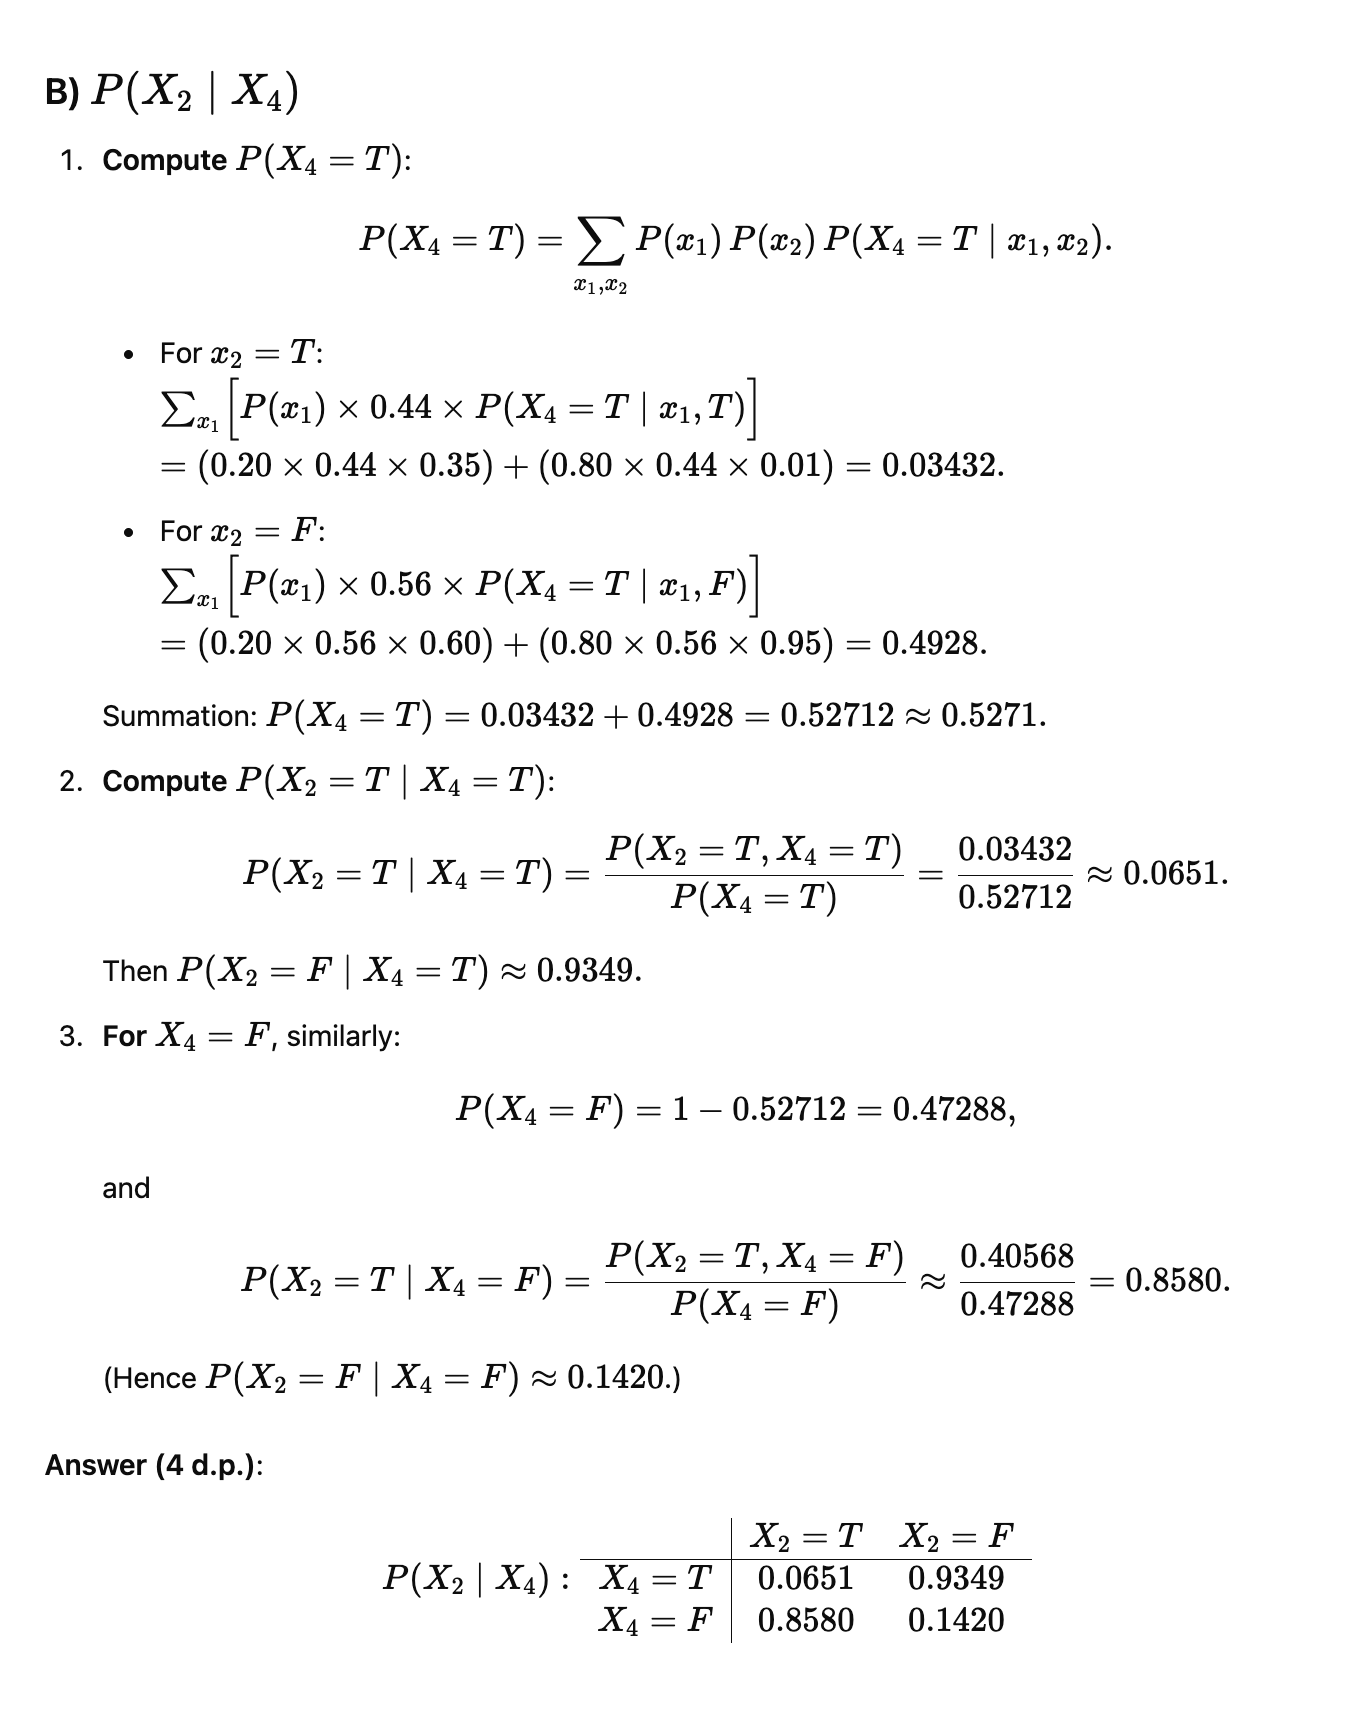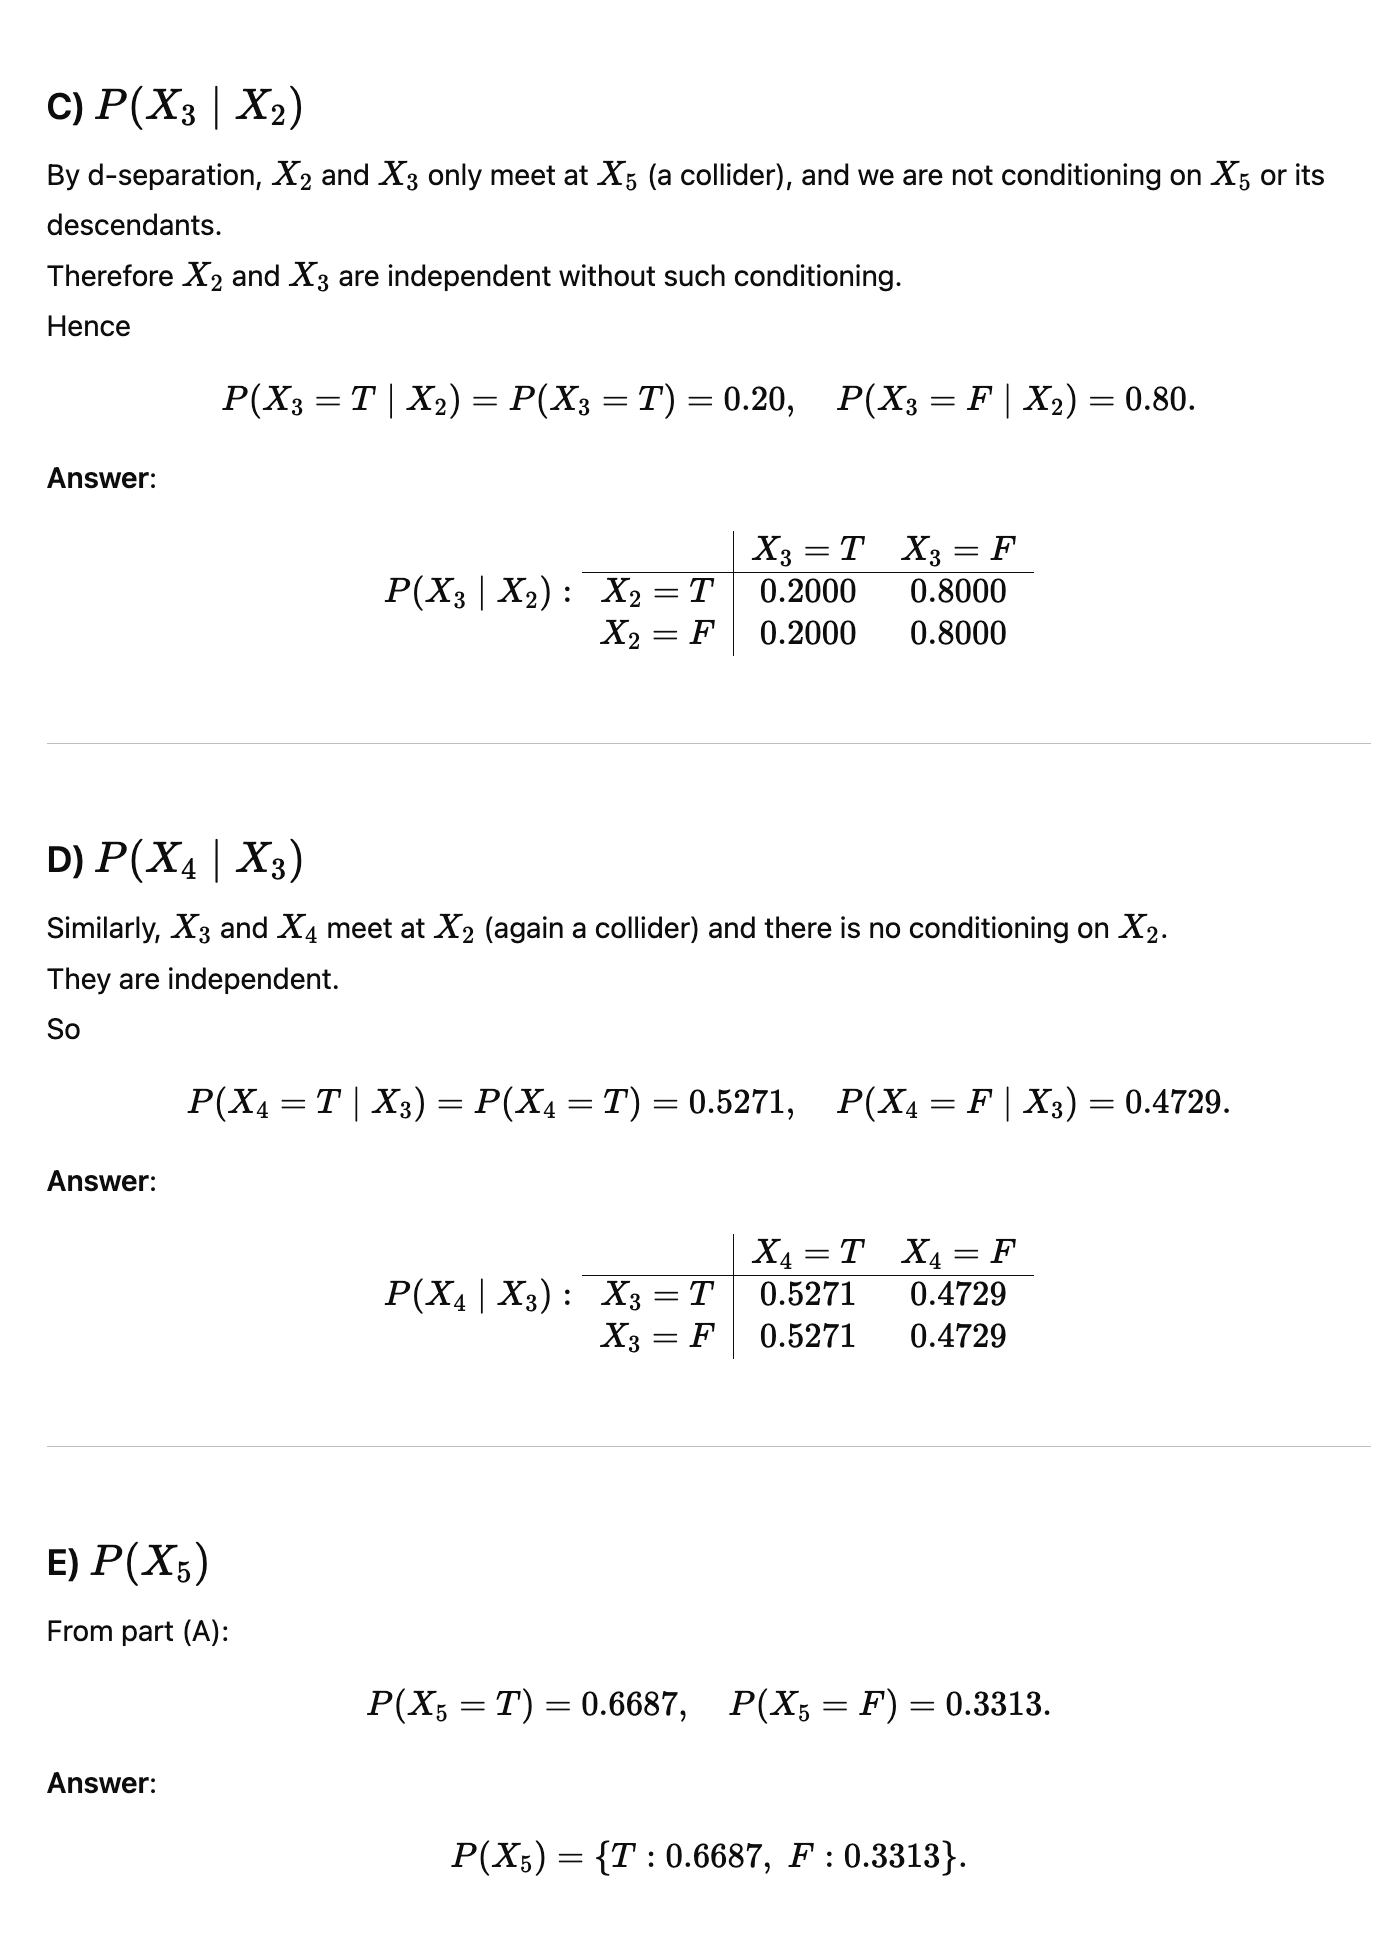

**PROBLEM 3** [20pts]

The figure below shows a Bayesian Net characterizing the causal relationship between $5$ random variables $X_1, X_2, X_3, X_4$ and $X_5$ where $X_1, X_2, X_4 \in \{0, 1\}$ while $X_3, X_5 \in \{0, 1, 2\}$.


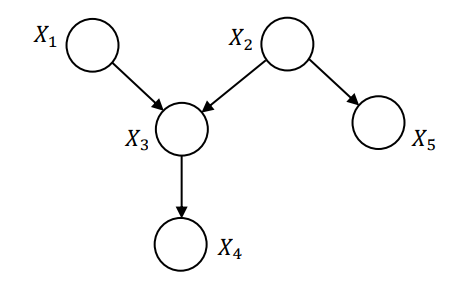

Answer the following questions:

A. Write down the factorized expression of the joint probability of $P(X_1, X_2, X_3, X_4, X_5)$ as indicated by the Bayesian Net. [5pts]

B. If $X_4$ is observed while the rest of the variables are unobserved, are $X_1$ and $X_5$ (conditionally) independent? Explain. [5pts]

C. Given the prior and conditional probability tables below for the above Bayesian Net, compute $P(X_1 \mid X_3 = 1, X_2)$ for all possible value assignments for $(X_1, X_2)$. [10pts]

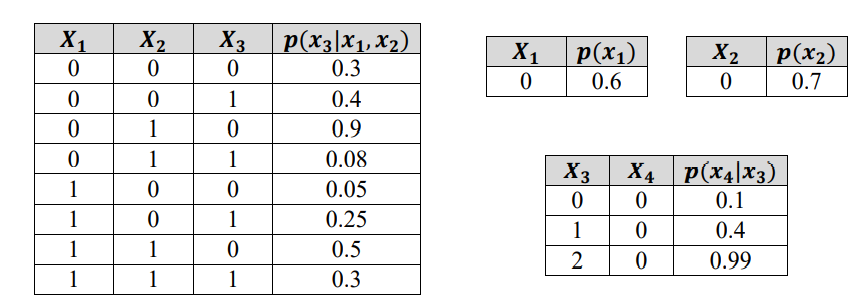




**SOLUTION**
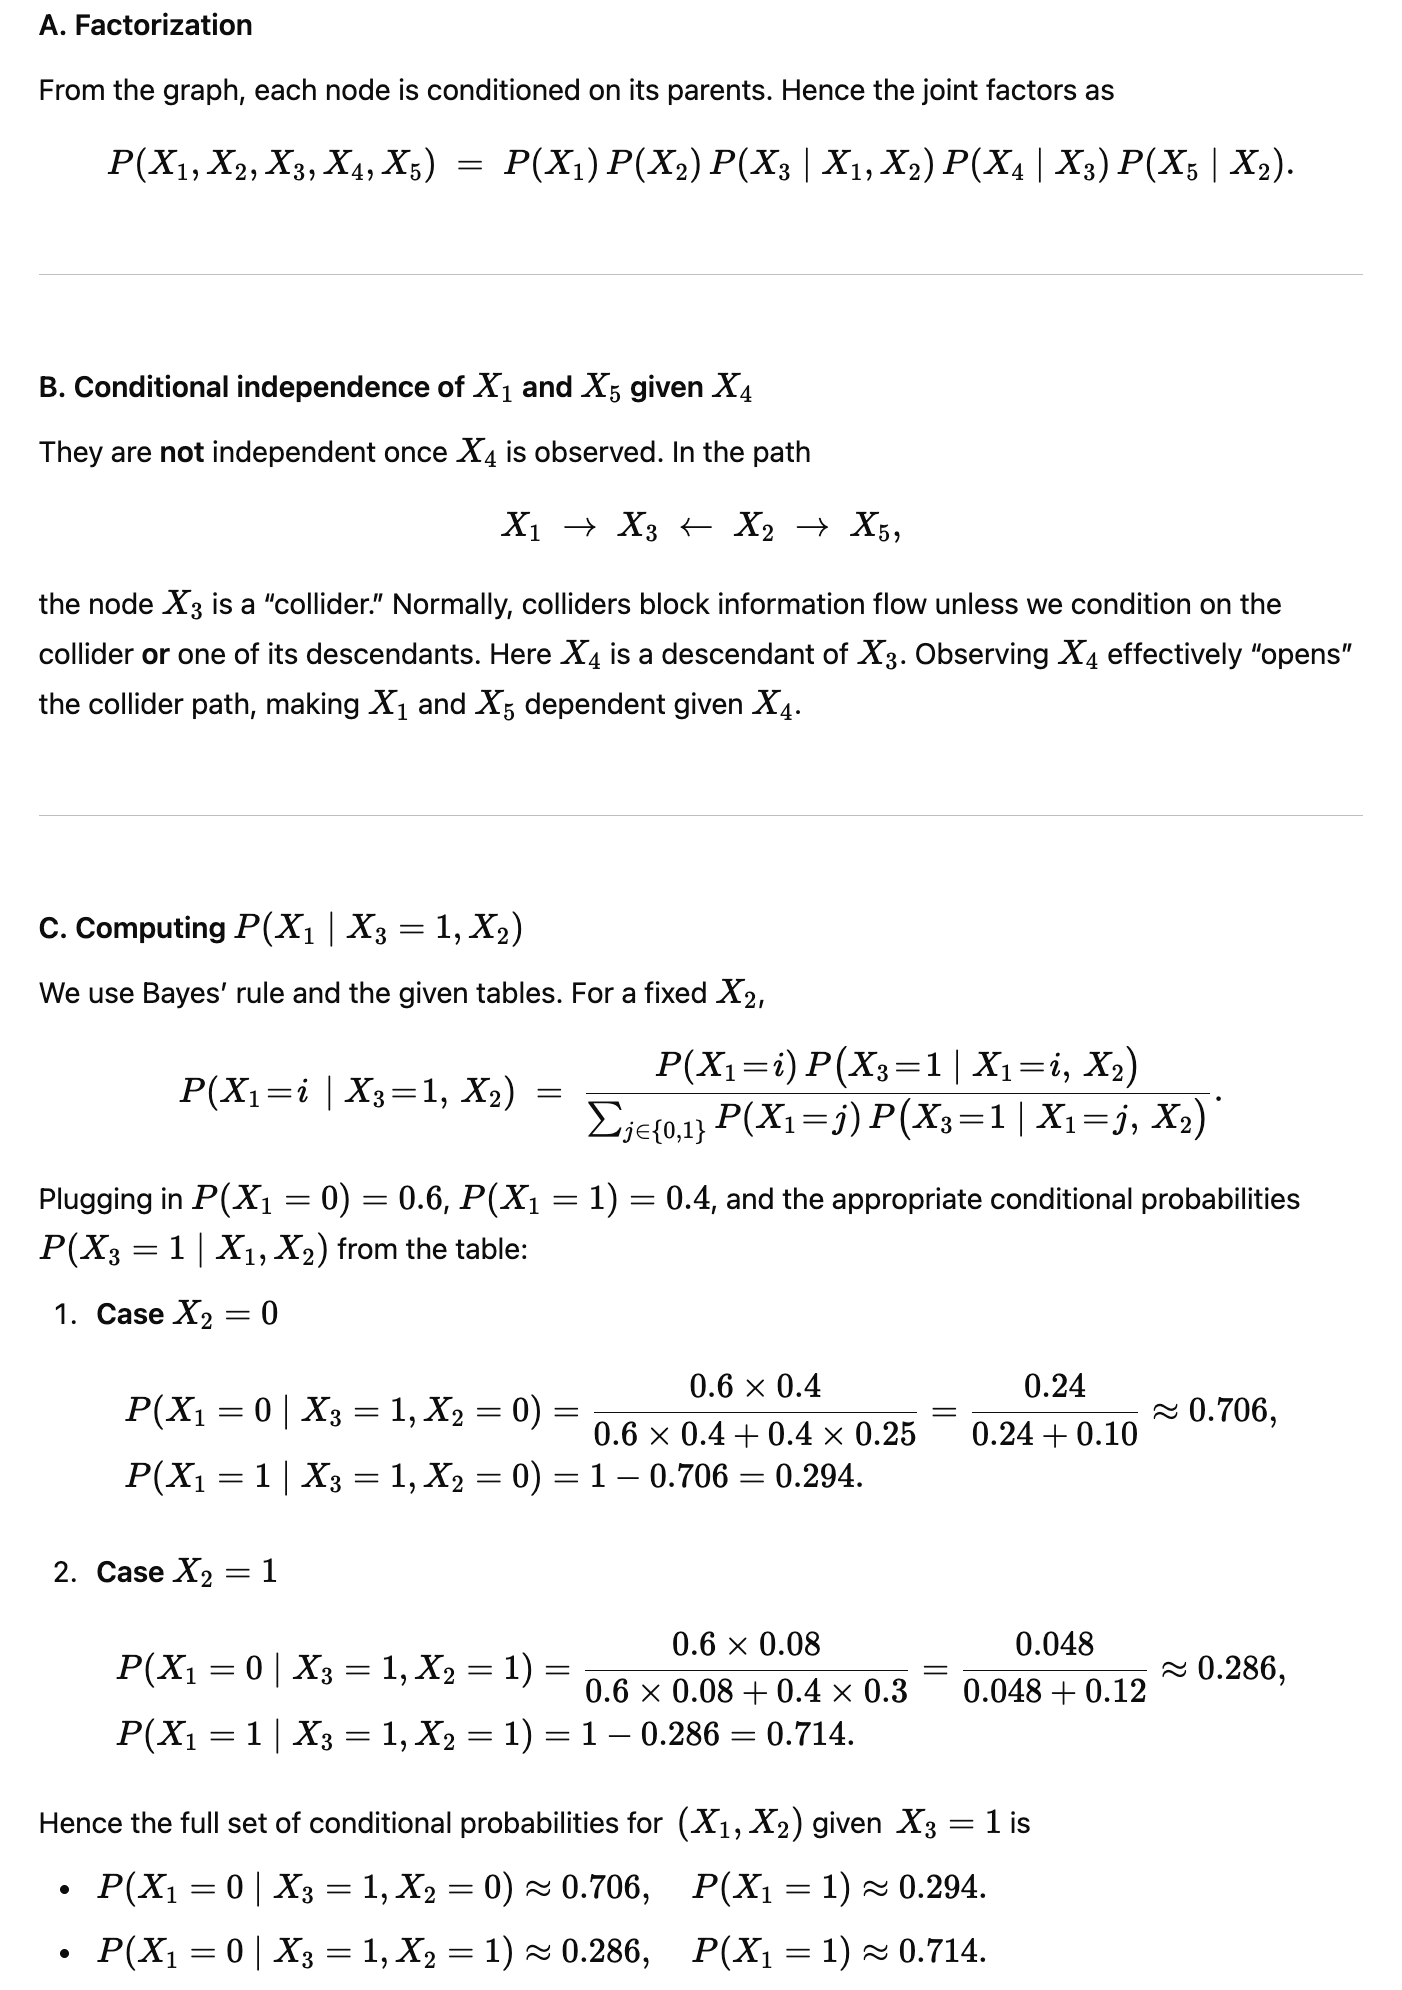


**PROBLEM 4** [20pts]

Let $S_0, S_1, \ldots, S_{n-1}$ and variables $X_0, X_1, \ldots, X_{m-1}$ be the two set of binary random variables such that $X_a \perp X_b \mid S_0, S_1, \ldots, S_{n-1}$ for every pair $(a, b)$.

Given the observed values $X_0 = x_0$, $X_1 = x_1$, ..., $X_{m-1} = x_{m-1}$, the prior probability $P(S_0, S_1, \ldots, S_{n-1})$ and the conditional probabilities $P(X_i \mid S_0, S_1, \ldots, S_{n-1})$ for $i \in [0, n - 1]$, write a program to compute the most likely values for $S_0, S_1, \ldots, S_{n-1}$. See an example of the input-output representation below.

**Input Example**

1. The prior probability $P(S_0, S_1, \ldots, S_{n-1})$ is represented by a dictionary (with $2^n$ entries) mapping from a binary configuration of $(S_0, S_1, \ldots, S_{n-1})$ to a number in $(0,1)$.
2. Each conditional probability table $P(X_i = 1 \mid S_0, S_1, \ldots, S_{n-1})$ is represented by a dictionary (with $2^n$ entries) mapping from a binary configuration of $(S_0, S_1, \ldots, S_{n-1})$ to $(0, 1)$, reflecting the conditional likelihood of $X_i = 1$.

See the code snippet below for a concrete input example.

In [ ]:
n, m = 3, 5

X = [0, 0, 1, 0, 0]

CPTS = {'000': 0.0029483374841282597, '001': 0.21655975865243066, '010': 0.009741791658102511, '011': 0.004396416434820812, '100': 0.14690857953281578, '101': 0.10442964963947308, '110': 0.09244430850469733, '111': 0.4225711580935315}  # P(S)
CPT = {}

CPT[0] = {'000': 0.2030970506369712, '001': 0.3488898852352653, '010': 0.5502799534069687, '011': 0.8116780058398033, '100': 0.8780276292367954, '101': 0.13639853016162218, '110': 0.25494090105549916, '111': 0.17343975131249711} # P(X_0 = 1 | S)
CPT[1] = {'000': 0.3523359812177728, '001': 0.5084318707330855, '010': 0.8889353192318028, '011': 0.5192775644869685, '100': 0.22672669454081784, '101': 0.5803945046731775, '110': 0.5186851363449407, '111': 0.563088061119118} # P(X_1 = 1 | S)
CPT[2] = {'000': 0.7560448918465935, '001': 0.6591799512712302, '010': 0.803089150479506, '011': 0.32072656535528443, '100': 0.9017673321979113, '101': 0.21612230050596615, '110': 0.3970404367134218, '111': 0.30886041650786145} # P(X_2 = 1 | S)
CPT[3] = {'000': 0.407051181263091, '001': 0.9360805132893405, '010': 0.1723367416994004, '011': 0.6788601067797836, '100': 0.15069804971864342, '101': 0.11500243160128079, '110': 0.440577342376775, '111': 0.467228843959817} # P(X_3 = 1 | S)
CPT[4] = {'000': 0.22235699425981859, '001': 0.8058219255695106, '010': 0.9005755426968436, '011': 0.22563339748467282, '100': 0.18785985930345855, '101': 0.5069987371763072, '110': 0.7447588081219547, '111': 0.6663412077070303} # P(X_4 = 1 | S)

**Output Example**

The correct output to the above example is a list [1, 0, 0], which indicates the most likely value configuration for the $S$-variable is $S_0 = 1$, $S_1 = 0$, $S_2 = 0$ given the observations [0, 0, 1, 0, 0] of the $X$-variables.


**Instruction: Your program is expected to have the following function definition:**

In [ ]:
from typing import Dict, List

def inference(m: int, n: int, X: List[int], Ps: Dict[str, float], Pxs: Dict[int, Dict[str, float]]) -> List[int]:
    """
    Given:
      m: number of observed X-variables
      n: number of hidden S-variables
      X: observed values [x0, x1, ..., x_{m-1}]
      Ps: dictionary { 'binary_of_S': prior_probability }
      Pxs: dictionary { i: { 'binary_of_S': P(X_i=1 | S) } }

    Returns:
      The most likely configuration of S (as a list of n bits).
    """

    best_config = None
    best_posterior = -1.0

    # Enumerate all 2^n possible states for S
    # Each key in Ps, Pxs[...] is a string like '010', so just iterate over them
    for s_str in Ps.keys():
        # 1) Prior
        prior = Ps[s_str]

        # 2) Compute likelihood = product over i of [P(X_i=1|s_str) if X_i=1, else 1-P(X_i=1|s_str)]
        likelihood = 1.0
        for i in range(m):
            p_xi_1_given_s = Pxs[i][s_str]
            if X[i] == 1:
                likelihood *= p_xi_1_given_s
            else:
                likelihood *= (1 - p_xi_1_given_s)

        posterior = prior * likelihood

        # Keep track of the highest posterior
        if posterior > best_posterior:
            best_posterior = posterior
            best_config = s_str

    # Convert the best_config string (e.g. '101') into a list of ints [1, 0, 1]
    return [int(bit) for bit in best_config]

# -- Example usage --
if __name__ == "__main__":
    n, m = 3, 5
    X = [0, 0, 1, 0, 0]

    Ps = {
        '000': 0.0029483374841282597, '001': 0.21655975865243066,
        '010': 0.009741791658102511, '011': 0.004396416434820812,
        '100': 0.14690857953281578, '101': 0.10442964963947308,
        '110': 0.09244430850469733, '111': 0.4225711580935315
    }
    Pxs = {
        0: {'000': 0.2030970506369712, '001': 0.3488898852352653, '010': 0.5502799534069687, '011': 0.8116780058398033,
            '100': 0.8780276292367954, '101': 0.13639853016162218, '110': 0.25494090105549916, '111': 0.17343975131249711},
        1: {'000': 0.3523359812177728, '001': 0.5084318707330855, '010': 0.8889353192318028, '011': 0.5192775644869685,
            '100': 0.22672669454081784, '101': 0.5803945046731775, '110': 0.5186851363449407, '111': 0.563088061119118},
        2: {'000': 0.7560448918465935, '001': 0.6591799512712302, '010': 0.803089150479506, '011': 0.32072656535528443,
            '100': 0.9017673321979113, '101': 0.21612230050596615, '110': 0.3970404367134218, '111': 0.30886041650786145},
        3: {'000': 0.407051181263091, '001': 0.9360805132893405, '010': 0.1723367416994004, '011': 0.6788601067797836,
            '100': 0.15069804971864342, '101': 0.11500243160128079, '110': 0.440577342376775, '111': 0.467228843959817},
        4: {'000': 0.22235699425981859, '001': 0.8058219255695106, '010': 0.9005755426968436, '011': 0.22563339748467282,
            '100': 0.18785985930345855, '101': 0.5069987371763072, '110': 0.7447588081219547, '111': 0.6663412077070303},
    }

    # Call the function
    result = inference(m, n, X, Ps, Pxs)
    print("Most likely S configuration:", result)


Most likely S configuration: [1, 0, 0]


In [ ]:
import numpy as np
import random

from typing import Dict, List
import numpy as np

def inference_solution(m: int, n: int, X: List, Ps: Dict[str, float], Pxs: Dict[int, Dict[str, float]]) -> List[int] :
    best_score, best_config = float("-inf"), None
    for config in Ps:
        log_probability = np.log(Ps[config])
        for i in range(m):
            if X[i] > 0:
                log_probability += np.log(Pxs[i][config])
            else:
                log_probability += np.log(1.0 - Pxs[i][config])
        if best_score < log_probability:
            best_score = log_probability
            best_config = config

    res = []
    for i in range(len(best_config)):
        if best_config[i] == '0':
            res.append(0)
        else:
            res.append(1)
    return res

def generate_binary_strings(n):
    if n == 0:
        return []
    if n == 1:
        return ["0", "1"]
    result = []
    for binary_string in generate_binary_strings(n - 1):
        result.append(binary_string + "0")
        result.append(binary_string + "1")
    return result

def categorical_distribution(K):
    # Generate a categorical distribution with K categories
    p = np.random.dirichlet(0.2 * np.ones(K))
    return p

def generate_test(m, n):
    CPTS = {}
    configs = generate_binary_strings(n)
    p = categorical_distribution(len(configs))
    for i, config in enumerate(configs):
        CPTS[config] = p[i]

    CPT = {}
    for i in range(m):
        CPT[i] = {}
        for config in configs:
            CPT[i][config] = random.uniform(0.05, 0.95)

    return CPTS, CPT

test_cases = []
for i in range(10):
    m, n = 10, 3
    CPTS, CPT = generate_test(m, n)
    X = np.random.choice([0, 1], size = m)
    test_cases.append((m, n, X, CPTS, CPT))

for i in range(5):
    m, n = 40, 4
    CPTS, CPT = generate_test(m, n)
    X = np.random.choice([0, 1], size = m)
    test_cases.append((m, n, X, CPTS, CPT))

for i in range(5):
    m, n = 200, 6
    CPTS, CPT = generate_test(m, n)
    X = np.random.choice([0, 1], size = m)
    test_cases.append((m, n, X, CPTS, CPT))

total, n_test = 0, len(test_cases)
for i in range(len(test_cases)):
    m, n, X, CPTS, CPT = test_cases[i]
    TA_sol = inference_solution(m, n, X, CPTS, CPT)  # this is where we call the TA's solution
    print(TA_sol)
    student_sol = inference(m, n, X, CPTS, CPT)  # this is where we call the student's solution
    total += (TA_sol == student_sol)

print("{}/{} tests are answered correctly.".format(total, n_test))

[0, 1, 1]
[0, 1, 0]
[1, 0, 0]
[1, 1, 1]
[1, 0, 1]
[0, 1, 0]
[1, 0, 1]
[0, 1, 1]
[1, 0, 0]
[1, 1, 0]
[1, 0, 0, 0]
[0, 1, 1, 0]
[1, 0, 1, 1]
[0, 1, 1, 0]
[0, 0, 1, 1]
[1, 0, 1, 1, 1, 0]
[1, 0, 1, 0, 1, 1]
[0, 1, 1, 1, 0, 1]
[1, 1, 0, 0, 0, 0]
[1, 1, 0, 1, 0, 1]
20/20 tests are answered correctly.


**How we grade this question:**

1. You are expected to substantiate the above **inference** function without changing its input and output definition.

2. You will not be graded if you change the input-output definition or name of **inference**

3. Your substantiated **inference** function will be called by the TA to produce answers to a number of test cases. Your grade is computed based on how many cases your code answers correctly.

4. Substantiating the code does not necessarily guarantee you any partial credit if your **inference** function crashes, does not produce correct answer or fails to do so within the time limit of maximum 5 seconds per test case.

**PROBLEM 5** [15pts]

Implement the Bayes Ball algorithm which finds in a directed acyclic graph G all variables **Z** that are independent of a set of source variables **X** given the evidence nodes **E**.

The graph G is represented using the nested list **A** in which **A[$i$]** is a list of children of node $i$ where $i \in [0, n-1]$. See the example below.

Note that **X**, **E** and **Z** are lists of nodes which are indexed from $0$ to $n - 1$.

Here is an example:

In [ ]:
A = [[1, 3], [4], [1], [4], [5], []]
X, E = [3], [0]

In the above example, **X** = [3] is independent with each node in **Z** = [1, 2] given **E** = [0]. Thus, the substantiated function **bayes_ball(A, [3], [0])** (see its function definition below) is expected to return [1,2] -- the order of nodes within the returned list does not matter.

**Instruction: Your program is expected to have the following function definition:**


In [ ]:
def bayes_ball(A : List, X : List, E : List) -> List :
    # fill in your implementation here
    return None  # replace None with the list of unreachable nodes computed above

In addition, you are also provided the following template as a starting point although you are NOT required to use it.

So, there is no need to e-mail me asking if you can change the code template.You can do whatver as long as the function definition above remains unchanged.

In [ ]:
def bayes_ball(A, X, E):
    """
    Returns the list of all nodes Z that are unreachable
    from X given the observed evidence E via the Bayes-Ball rules.
    A is an adjacency list: A[i] = list of children of node i.
    X, E are lists of observed/source nodes by index.
    """
    from collections import deque

    n = len(A)
    X = set(X)
    E = set(E)

    # ----------------------------------------------------------------
    # 1. Compute the set of parents for each node.
    # ----------------------------------------------------------------
    parents = [[] for _ in range(n)]
    for i in range(n):
        for c in A[i]:
            parents[c].append(i)

    # Helper to determine if a node is a collider:
    # here we define "collider" = having 2 or more parents
    def is_collider(node):
        return len(parents[node]) > 1

    # ----------------------------------------------------------------
    # 2. Compute ancestors of E (used for collider logic).
    # ----------------------------------------------------------------
    def find_ancestors(evid_nodes):
        to_visit = deque(evid_nodes)
        visited = set(evid_nodes)
        while to_visit:
            curr = to_visit.popleft()
            for p in parents[curr]:
                if p not in visited:
                    visited.add(p)
                    to_visit.append(p)
        return visited

    ancestors_of_E = find_ancestors(E)

    # ----------------------------------------------------------------
    # 3. Bayes-Ball reachability: BFS with queue of (node, direction).
    #    direction=0 means "arrived from a child" (going upstream),
    #    direction=1 means "arrived from a parent" (going downstream).
    # ----------------------------------------------------------------
    queue = deque()
    visited = set()  # visited holds (node, direction) pairs
    reachable = set()

    # Initialize the queue with each source X in both directions
    for x in X:
        queue.append((x, 0))  # as if we came from a child
        queue.append((x, 1))  # as if we came from a parent

    while queue:
        node, direction = queue.popleft()
        if (node, direction) in visited:
            continue
        visited.add((node, direction))
        reachable.add(node)

        # ------------------------------------------------------------
        #  CASE 1: Node is in E (observed)
        # ------------------------------------------------------------
        if node in E:
            if direction == 0:
                # arrived from child => can only go UP to parents
                for p in parents[node]:
                    queue.append((p, 0))
            else:
                # arrived from parent => normally we would block,
                # but if it's a collider, the node being observed
                # "activates" its incoming edges:
                if is_collider(node):
                    # go up to parents
                    for p in parents[node]:
                        queue.append((p, 0))
                    # also go down to children (Test 5 specifically wants this)
                    for c in A[node]:
                        queue.append((c, 1))
                else:
                    # chain/fork with an observed node => blocks downward
                    pass

        # ------------------------------------------------------------
        #  CASE 2: Node is UNobserved
        # ------------------------------------------------------------
        else:
            if direction == 0:
                # from child => can go up to parents and down to children
                for p in parents[node]:
                    queue.append((p, 0))
                for c in A[node]:
                    queue.append((c, 1))
            else:
                # from parent => unobserved node always allows down to children
                for c in A[node]:
                    queue.append((c, 1))

                # also, if node or a descendant is observed (ancestors_of_E),
                # then it's an "activated" collider path => can go up to parents
                if (node in E) or (node in ancestors_of_E):
                    for p in parents[node]:
                        queue.append((p, 0))

    # ----------------------------------------------------------------
    # 4. Everything not in reachable is unreachable
    # ----------------------------------------------------------------
    unreachable = [i for i in range(n) if i not in reachable]
    return unreachable


# ----------------------------------------------------------------------------
# TEST CASES
# ----------------------------------------------------------------------------

def run_tests():
    # (1) Example from the problem statement
    A1 = [[1, 3],  # children of 0
          [4],     # children of 1
          [1],     # children of 2
          [4],     # children of 3
          [5],     # children of 4
          []]      # children of 5
    X1, E1 = [3], [0]
    print("\nTest 1:")
    print("Graph A:", A1)
    print("X:", X1, "E:", E1)
    result1 = bayes_ball(A1, X1, E1)
    print("Unreachable (should match [1,2]):", result1)

    # (2) Simple chain graph: 0 -> 1 -> 2 -> 3 -> 4
    #     If X=[0], E=[] => everything is reachable => unreachable=[]
    A2 = [[1], [2], [3], [4], []]
    X2, E2 = [0], []
    print("\nTest 2:")
    print("Graph A:", A2)
    print("X:", X2, "E:", E2)
    result2 = bayes_ball(A2, X2, E2)
    print("Unreachable (expect []):", result2)

    # (3) Same chain, but node 2 is observed => blocks
    #     from 0 to 3,4 => unreachable = [3,4].
    A3 = [[1], [2], [3], [4], []]
    X3, E3 = [0], [2]
    print("\nTest 3:")
    print("Graph A:", A3)
    print("X:", X3, "E:", E3)
    result3 = bayes_ball(A3, X3, E3)
    print("Unreachable (expect [3,4]):", result3)

    # (4) Collider 0->2<-1, 2->3. E=[]
    #     => node 1 is unreachable from 0
    #     => unreachable=[1]
    A4 = [[2], [2], [3], []]
    X4, E4 = [0], []
    print("\nTest 4 (Collider):")
    print("Graph A:", A4)
    print("X:", X4, "E:", E4)
    result4 = bayes_ball(A4, X4, E4)
    print("Unreachable (expect [1]):", result4)

    # (5) Same collider, but 2 is observed => it "activates" the path
    #     from 0 to 2<-1 and also 2->3 => so everything is reachable => []
    X5, E5 = [0], [2]
    print("\nTest 5 (Collider with Observed Node 2):")
    print("Graph A:", A4)
    print("X:", X5, "E:", E5)
    result5 = bayes_ball(A4, X5, E5)
    print("Unreachable (expect []):", result5)


if __name__ == "__main__":
    run_tests()



Test 1:
Graph A: [[1, 3], [4], [1], [4], [5], []]
X: [3] E: [0]
Unreachable (should match [1,2]): [1, 2]

Test 2:
Graph A: [[1], [2], [3], [4], []]
X: [0] E: []
Unreachable (expect []): []

Test 3:
Graph A: [[1], [2], [3], [4], []]
X: [0] E: [2]
Unreachable (expect [3,4]): [3, 4]

Test 4 (Collider):
Graph A: [[2], [2], [3], []]
X: [0] E: []
Unreachable (expect [1]): [1]

Test 5 (Collider with Observed Node 2):
Graph A: [[2], [2], [3], []]
X: [0] E: [2]
Unreachable (expect []): []


In [ ]:
import networkx as nx
import random

# main function
def bayes_ball_solution(A : List, X : List, E : List) -> List :  # solution to problem 4
    ans = set(ancestor(A, E))  # create ancestor of E
    parents = create_parent(A)  # create child/parent registry
    frontier, explored = [], set([])  # initialize frontier and explored tables

    reachable = set([])
    E = set(E)

    for node in X:
        frontier.append((node, 0))  # add state = (node, from-child) to frontier
        explored.add((node, 0))  # mark the state as seen (explored or scheduled to be explored)
        reachable.add(node)

    while len(frontier) > 0:
        node, direction = frontier[0]
        frontier.pop(0)
        reachable.add(node)

        if node in E:  # if this node is observed
            if direction == 0:  # if it is reached by moving upstream from a child (direction = from-child)
                continue
            else:  # if direction = from-parent
                for parent in parents[node]:
                    if (parent, 0) not in explored:
                        frontier.append((parent, 0))
                        explored.add((parent, 0))
        else:  # if this node is unobserved
            if direction == 0:  # if it is reached by moving upstream from a child (direction = from-child)
                for parent in parents[node]:
                    if (parent, 0) not in explored:
                        frontier.append((parent, 0))
                        explored.add((parent, 0))
                for child in A[node]:
                    if (child, 1) not in explored:
                        frontier.append((child, 1))
                        explored.add((child, 1))
            else:
                for child in A[node]:
                    if (child, 1) not in explored:
                        explored.add((child, 1))
                        frontier.append((child, 1))
                if node in ans:
                    for parent in parents[node]:
                        if (parent, 0) not in explored:
                            explored.add((parent, 0))
                            frontier.append((parent, 0))

    res = []
    for node in range(len(A)):
        if node not in reachable:
            res.append(node)

    return res

# auxiliary function -- need to check if a descendant of the middle node in an common effect trail is in the observed list or not
def create_parent(A):  # create a mapping from each node in A to its list of immediate parents
    parents = {}  # child registration
    for node in range(len(A)):
        parents[node] = set([])

    for node in range(len(A)):  # for each node in the graph
        for child in A[node]:  # enumerate through its children
            parents[child].add(node)  # add "node" to its list of parents

    for node in range(len(A)):  # for each node
        parents[node] = list(parents[node])  # put its parents into a list

    return parents

def ancestor(A : List, X : List) -> List:  # find the list of ancestors of nodes in X
    frontier, explored = [], set([])  # initialize frontier and explored tables
    for node in X:
        frontier.append(node)  # add node to frontier to be explored
        explored.add(node) # record that this node has been scheduled to be explored

    parent = create_parent(A)  # create a mapping from a node to its parent

    res = []
    while len(frontier) > 0:
        node = frontier[0]  # take the node at the top
        frontier.pop(0) # remove it from the frontier
        res.append(node) # node can be reached from X

        for reachable in parent[node]:  # for each parent of node
            if reachable not in explored:  # if it has not been seen before
                frontier.append(reachable)  # add it to the frontier
                explored.add(reachable)  # record that it has been scheduled to be explored

    return res  # return result

def generate_dag(n_node, n_edge, max_parent = 8, no_cycle = True):  # generate a random directed acyclic graph with n_node and n_edge
    G = nx.DiGraph()
    A = [[]]
    parents = {}
    parents[0] = set()
    G.add_node(1)  # add root node
    for i in range(2, n_node + 1):
        G.add_node(i)
        G.add_edge(1, i)  # root node has a directed edge to every other node
        A.append([])
        parents[i - 1] = set([0])
        A[0].append(i - 1)

    for i in range(n_edge):  # for each edge
        source = random.randint(1, n_node)  # randomize source node
        target = random.randint(1, n_node)  # randomize target node
        if no_cycle:
            while (target - 1) in ancestor(A, [source - 1]) or len(parents[target - 1]) >= max_parent:  # do this again until target is not an ancestor of source and the number of parents of target is < max_parent
                source = random.randint(1, n_node)
                target = random.randint(1, n_node)
        else:
            while target == source:
                source = random.randint(1, n_node)
                target = random.randint(1, n_node)

        A[source - 1].append(target - 1)
        parents[target - 1].add(source - 1)
        G.add_edge(source, target)

    for i in range(len(A)):
        A[i] = list(set(A[i]))
        parents[i] = list(parents[i])

    return A, parents, G  # A is the adjacency list representation of G while G is the DiGraph object that helps with visualization -- G uses 1-based indexing while A uses 0-based indexing

small_test = []
for i in range(10):  # generate small tests
    print("Generating test case no. {}".format(i))
    A, parents, G = generate_dag(7, 9, max_parent = 5)
    XE = random.sample(range(1, len(A)), 4)
    E = XE[1:]
    X = XE[:1]
    small_test.append((A, X, E + [0], G))

medium_test = []
for i in range(10):  # generate medium tests
    print("Generating test case no. {}".format(i))
    A, parents, G = generate_dag(30, 50, max_parent = 8)
    XE = random.sample(range(1, len(A)), 10)
    E = XE[1:]
    X = XE[:1]
    medium_test.append((A, X, E + [0], G))

large_test = []
for i in range(5):  # generate large tests
    print("Generating test case no. {}".format(i))
    A, parents, G = generate_dag(100, 300, max_parent = 8)
    XE = random.sample(range(1, len(A)), 60)
    E = XE[1:]
    X = XE[:1]
    large_test.append((A, X, E + [0], G))

score, total = 0, len(small_test) + len(medium_test) + len(large_test)

for i in range(len(small_test)):  # grading code for small tests
    A, X, E, G = small_test[i]
    TA_sol = set(bayes_ball_solution(A, X, E))  # where we call the TA's solution
    print(list(TA_sol))
    student_sol = set(bayes_ball(A, X, E))  # where we call the student's solution
    print(list(student_sol))
    score += (TA_sol == student_sol)

for i in range(len(medium_test)):  # grading code for medium tests
    A, X, E, G = medium_test[i]
    TA_sol = set(bayes_ball_solution(A, X, E))  # where we call the TA's solution
    print(list(TA_sol))
    student_sol = set(bayes_ball(A, X, E))  # where we call the student's solution
    print(list(student_sol))
    score += (TA_sol == student_sol)

for i in range(len(large_test)):  # grading code for large tests
    A, X, E, G = large_test[i]
    TA_sol = set(bayes_ball_solution(A, X, E))  # where we call the TA's solution
    print(list(TA_sol))
    student_sol = set(bayes_ball(A, X, E))  # where we call the student's solution
    print(list(student_sol))
    score += (TA_sol == student_sol)

print("{}/{} tests are answered correctly.".format(score, total))

Generating test case no. 0
Generating test case no. 1
Generating test case no. 2
Generating test case no. 3
Generating test case no. 4
Generating test case no. 5
Generating test case no. 6
Generating test case no. 7
Generating test case no. 8
Generating test case no. 9
Generating test case no. 0
Generating test case no. 1
Generating test case no. 2
Generating test case no. 3
Generating test case no. 4
Generating test case no. 5
Generating test case no. 6
Generating test case no. 7
Generating test case no. 8
Generating test case no. 9
Generating test case no. 0
Generating test case no. 1
Generating test case no. 2
Generating test case no. 3
Generating test case no. 4
[6]
[6]
[1, 2, 3, 4, 6]
[1, 2, 3, 4, 6]
[1, 4, 5, 6]
[]
[1, 2]
[2]
[2, 4, 5, 6]
[2, 4, 5, 6]
[]
[]
[1, 3, 4, 5, 6]
[1, 3, 4, 5, 6]
[]
[]
[]
[]
[3]
[3]
[]
[]
[4, 11, 16, 20, 21]
[16, 11, 4]
[1, 3, 4, 5, 6, 7, 8, 9, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 28, 29]
[9, 18]
[24, 11, 5, 6]
[24, 11]
[2, 7, 

**How we grade this question:**

1. You are expected to substantiate the above **bayes_ball** function without changing its input and output definition.

2. You will not be graded if you change the input-output definition or name of **bayes_ball**

3. Your substantiated **bayes_ball** function will be called by the TA to produce answers to a number of test cases. Your grade is computed based on how many cases your code answers correctly.

4. Substantiating the code does not necessarily guarantee you any partial credit if your **bayes_ball** function crashes, does not produce correct answer or fails to do so within the time limit of maximum 5 seconds per test case.